## __AAL sales report for the fourth quarter for 2020 across Australia__

**1.Data Wrangling**

In [41]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
import dash
#import dash_core_components as dcc
#import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")

In [42]:
# Loading the file that contains the Sales data
sales_data = pd.read_csv("AusApparalSales4thQrt2020.csv")

In [43]:
 sales_data

Date        Time State     Group  Unit  Sales
0      1-Oct-2020     Morning    WA      Kids     8  20000
1      1-Oct-2020     Morning    WA       Men     8  20000
2      1-Oct-2020     Morning    WA     Women     4  10000
3      1-Oct-2020     Morning    WA   Seniors    15  37500
4      1-Oct-2020   Afternoon    WA      Kids     3   7500
...           ...         ...   ...       ...   ...    ...
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]

In [44]:
# Viewing the types and null values of the data
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [45]:
sales_data['Sales'] = sales_data['Sales'].astype(int)

In [46]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d-%b-%Y')

In [47]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(3)
memory usage: 325.0+ KB


In [48]:
# Checking memory
sales_data.memory_usage()

Index      132
Date     60480
Time     60480
State    60480
Group    60480
Unit     60480
Sales    30240
dtype: int64

In [49]:
# Checking for null Values
sales_data.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

We can conclude from this table that there are no missing data in the table 
the total number of the sales data is ***7560***

In [50]:
# Desciptive stats of the numeric data types
sales_data.describe()

Date         Unit          Sales
count                           7560  7560.000000    7560.000000
mean   2020-11-15 04:00:00.000000256    18.005423   45013.558201
min              2020-10-01 00:00:00     2.000000    5000.000000
25%              2020-10-23 00:00:00     8.000000   20000.000000
50%              2020-11-15 12:00:00    14.000000   35000.000000
75%              2020-12-08 00:00:00    26.000000   65000.000000
max              2020-12-30 00:00:00    65.000000  162500.000000
std                              NaN    12.901403   32253.506944

In [51]:
# Checking for duplicates
sales_data[sales_data.duplicated()].count()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [52]:
# Unique Entries
print(sales_data['Time'].unique())
print(sales_data['State'].unique())
print(sales_data['Group'].unique())

[' Morning' ' Afternoon' ' Evening']
[' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
[' Kids' ' Men' ' Women' ' Seniors']


In [53]:
# Creating a copy of the sales_data for further processing
sd = sales_data.copy()

In [54]:
#Normalization
scaler = MinMaxScaler()
sd['normalized_unit']=scaler.fit_transform(sd[['Unit']])
sd['normalized_sales']=scaler.fit_transform(sd[['Sales']])
sd.describe()

Date         Unit          Sales  \
count                           7560  7560.000000    7560.000000   
mean   2020-11-15 04:00:00.000000256    18.005423   45013.558201   
min              2020-10-01 00:00:00     2.000000    5000.000000   
25%              2020-10-23 00:00:00     8.000000   20000.000000   
50%              2020-11-15 12:00:00    14.000000   35000.000000   
75%              2020-12-08 00:00:00    26.000000   65000.000000   
max              2020-12-30 00:00:00    65.000000  162500.000000   
std                              NaN    12.901403   32253.506944   

       normalized_unit  normalized_sales  
count      7560.000000       7560.000000  
mean          0.254054          0.254054  
min           0.000000          0.000000  
25%           0.095238          0.095238  
50%           0.190476          0.190476  
75%           0.380952          0.380952  
max           1.000000          1.000000  
std           0.204784          0.204784

In [55]:
#Checking for Outliers
#Outliers in the Unit column
px.box(sd['Unit'])

In [56]:
Q1 =sd['Unit'].quantile(0.25)
Q3 =sd['Unit'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
filter =(sd['Unit']>= Q1 - 1.5 * IQR) &(sd['Unit']<= Q3 + 1.5 *IQR)
md = sd.loc[filter]

We can observe from the box plot that the ***units 54 and above*** are the ***outliers*** in the plot

In [57]:
#Sales column Outliers
px.box(md['Sales'])

In [58]:
# Defining Quartiles
Q1 =md['Sales'].quantile(0.25)
Q3 =md['Sales'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.

# Filtering data based on Quartiles
filter =(md['Sales']>= Q1 - 1.5 * IQR) &(md['Sales']<= Q3 + 1.5 *IQR)
md = md.loc[filter]

As we can observe, the sales ***above 125K to 132.5K*** are the ***outliers*** and ***md*** is newdata frame after renmoving Outliers

In [59]:
# Count the number of sales for each group in 'sd' and 'md' before and after removing outliers
before_counts = sd.groupby('Group').count()['Sales']
after_counts = md.groupby('Group').count()['Sales']

# Create a DataFrame from the counts, with 'before' and 'after' as index labels
counts_comparison = pd.DataFrame([before_counts, after_counts], index=['before', 'after'])

# Display the DataFrame
print(counts_comparison)

Group    Kids   Men   Seniors   Women
before   1890  1890      1890    1890
after    1856  1850      1851    1852


As we can see from the below data all the ***four groups kids, men, seniors and women*** lost ***34,40, 39 & 38*** values respectively
***md*** is the dataframe with outliers from unit and sales removed

In [60]:
#Normalization
scaler = MinMaxScaler()
sd['normalized_unit']=scaler.fit_transform(sd[['Unit']])
sd['normalized_sales']=scaler.fit_transform(sd[['Sales']])
sd.describe()

Date         Unit          Sales  \
count                           7560  7560.000000    7560.000000   
mean   2020-11-15 04:00:00.000000256    18.005423   45013.558201   
min              2020-10-01 00:00:00     2.000000    5000.000000   
25%              2020-10-23 00:00:00     8.000000   20000.000000   
50%              2020-11-15 12:00:00    14.000000   35000.000000   
75%              2020-12-08 00:00:00    26.000000   65000.000000   
max              2020-12-30 00:00:00    65.000000  162500.000000   
std                              NaN    12.901403   32253.506944   

       normalized_unit  normalized_sales  
count      7560.000000       7560.000000  
mean          0.254054          0.254054  
min           0.000000          0.000000  
25%           0.095238          0.095238  
50%           0.190476          0.190476  
75%           0.380952          0.380952  
max           1.000000          1.000000  
std           0.204784          0.204784

**2. Data Analysis**

In [61]:
# Extracting Max and Minimum of the Sales
max_sale = sd['Sales'].max()
min_sale = sd['Sales'].min()
print(f'Maximum sale: {max_sale}')
print(f'Minimum sale: {min_sale}')

Maximum sale: 162500
Minimum sale: 5000


In [62]:
# Using plotly histogram for more data and interaction
sales_hist = px.histogram(sd, x='Sales')
sales_hist.show()

From the above graph, we can see that the highest value sale is of value ***162.5k*** which occured ***11 times***
while the sales of value ***22.5k*** has occured ***406 times*** which is ***highest by count*** 
the ***lowest sales*** value is of ***5000*** which occured ***130 times***

In [63]:
# Using plotly histogram for more data and interaction
sales_hist = px.histogram(sd, x='Unit')
sales_hist.show()

From the above graph, we can see that ***the highest*** value of unit is of value ***65*** which occured ***11 times***
while the unit of value 9 has occured ***406 times*** which is ***highest by count***
***the lowest*** unit value is of ***2*** which occured ***130 times*** We can also see that, ****frequency*** of the data in sales and unit is ***same***

In [64]:
print(f'>>> {162500/65}')
print(f'>>> {22500/9}')

>>> 2500.0
>>> 2500.0


We can see that the per unit price is ***2500***

## **3.Data Visualization**

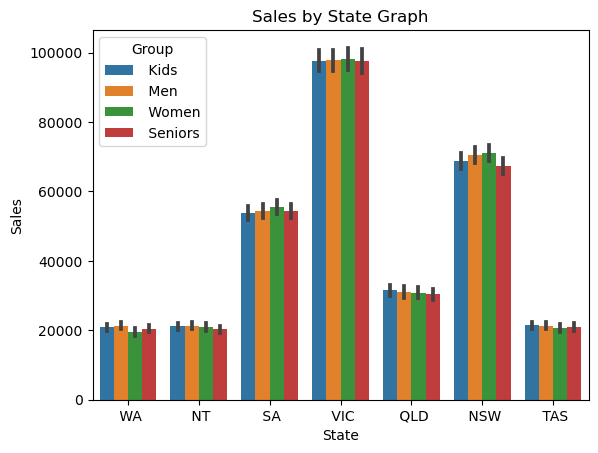

In [65]:
# Using seaborn graph to show sales in different States
state_sales =sns.barplot(data =sd,x='State',y='Sales',hue ='Group')
plt.title('Sales by State Graph')
plt.show()

From the graph we can infer that the ***sales*** is ***highest*** in the VIC state followed by ***NSW*** and ***SA***
The ***highest*** sales in ***VIC*** was from ***Women*** whereas it was lowest in ***WA***
The ***lowest sales states are WA, NT and TAS***

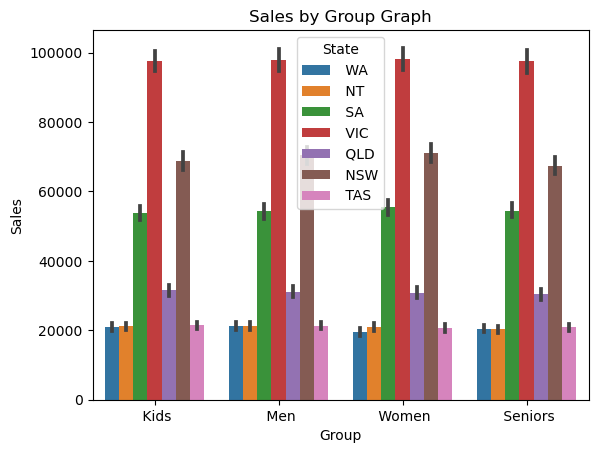

In [66]:
# Using seaborn graph to show sales in different Groups
state_sales =sns.barplot(data =sd,x='Group',y='Sales', hue ='State')
plt.title('Sales by Group Graph')
plt.show()

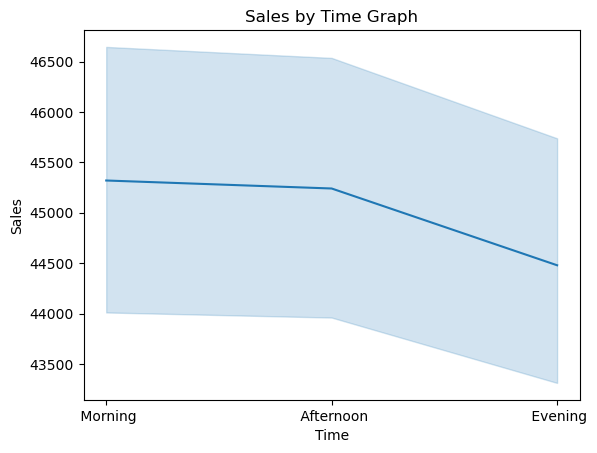

In [67]:
#Using seaborn graph to show sales by time
time_sales =sns.lineplot(data =sd,x='Time',y='Sales')
plt.title('Sales by Time Graph')
plt.show()

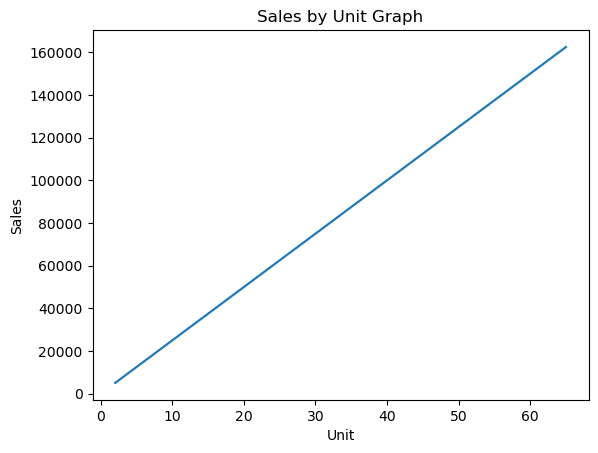

In [68]:
Unit_sales =sns.lineplot(data =sd,x='Unit',y='Sales')
plt.title('Sales by Unit Graph')
plt.show()

In [69]:
#Convert index to datetime64[ns]
sd.index = pd.to_datetime(sd.index)
print(sd.index)

DatetimeIndex([          '1970-01-01 00:00:00',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000002',
               '1970-01-01 00:00:00.000000003',
               '1970-01-01 00:00:00.000000004',
               '1970-01-01 00:00:00.000000005',
               '1970-01-01 00:00:00.000000006',
               '1970-01-01 00:00:00.000000007',
               '1970-01-01 00:00:00.000000008',
               '1970-01-01 00:00:00.000000009',
               ...
               '1970-01-01 00:00:00.000007550',
               '1970-01-01 00:00:00.000007551',
               '1970-01-01 00:00:00.000007552',
               '1970-01-01 00:00:00.000007553',
               '1970-01-01 00:00:00.000007554',
               '1970-01-01 00:00:00.000007555',
               '1970-01-01 00:00:00.000007556',
               '1970-01-01 00:00:00.000007557',
               '1970-01-01 00:00:00.000007558',
               '1970-01-01 00:00:00.000007559'],
              dtype=

In [70]:

# Convert 'Date' column to datetime type
sd['Date'] = pd.to_datetime(sd['Date'], format='%d-%b-%Y')

# Set 'Date' column as index
sd.set_index('Date', inplace=True)

# Resample to daily frequency and sum the 'Sales' column
daily_report = sd.resample('D').agg({'Sales': 'sum'})

# Plot the daily sales using Plotly Express
daily_sale = px.line(data_frame=daily_report, y='Sales', title='Daily Sales')
daily_sale.show()

In [71]:
# Resample to weekly frequency and sum the 'Sales' column
weekly_report = sd.resample('W').agg({'Sales': 'sum'})

# Plot the weekly sales using Plotly Express
weekly_sale = px.line(data_frame=weekly_report, y='Sales', title='Weekly Sales')
weekly_sale.show()

In [72]:
# Resample to monthly frequency and sum the 'Sales' column
monthly_report = sd.resample('M').agg({'Sales': 'sum'})

# Plot the monthly sales using Plotly Express
monthly_sale = px.line(data_frame=monthly_report, y='Sales', title='Monthly Sales')
monthly_sale.show()

In [73]:
sales_data

Date        Time State     Group  Unit  Sales
0    2020-10-01     Morning    WA      Kids     8  20000
1    2020-10-01     Morning    WA       Men     8  20000
2    2020-10-01     Morning    WA     Women     4  10000
3    2020-10-01     Morning    WA   Seniors    15  37500
4    2020-10-01   Afternoon    WA      Kids     3   7500
...         ...         ...   ...       ...   ...    ...
7555 2020-12-30   Afternoon   TAS   Seniors    14  35000
7556 2020-12-30     Evening   TAS      Kids    15  37500
7557 2020-12-30     Evening   TAS       Men    15  37500
7558 2020-12-30     Evening   TAS     Women    11  27500
7559 2020-12-30     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]

In [74]:

# Resample the data to get quarterly report
quarterly_report = sd.resample('Q').sum()

# Create bar plot for quarterly sales
quaterly_sale = go.Bar(x=quarterly_report.index,
                       y=quarterly_report['Sales'],
                       name='Quarterly Sales')

# Create a figure and add the bar trace to it
fig = go.Figure(quaterly_sale)

# Show the figure
fig.show()

From the graphs of ***daily, weekly and monthly*** we can see that the ***november had 
the lowestsales while december had the highest sales***
For ***Quaterly*** graph we have ***only one bar*** as the dataset contains data from only one quater.

In [75]:
sales_data.index = pd.to_datetime(sales_data.index)

In [76]:
# Create subplots
fig = make_subplots(rows=2, cols=4,
                    subplot_titles=("State-wise Sales", "Group-wise Sales",
                                    "Time-wise Sales","Unit-wise sales", "Daily Sales",
                                    "Weeakly Sales ","Monthly Sales ",
                                    "Quarterly Sales"))

# State-wise sales analysis for different groups
fig.add_trace(go.Bar(x=sd['State'], y=sd['Sales'], name='Sales', marker=dict(color='rgb(34, 111, 255)')), row=1, col=1)
fig.add_trace(go.Bar(x=sd['State'], y=sd['normalized_sales'], name='Normalized sales'), row=1, col=1)

# Group-wise sales analysis across different states
fig.add_trace(go.Bar(x=sd['Group'], y=sd['Sales'], name='Sales'), row=1, col=2)
fig.add_trace(go.Bar(x=sd['Group'], y=sd['normalized_sales'], name='Normalized sales', marker=dict(color='rgb(55, 83, 109)')), row=1, col=2)

# Time-of-the-day analysis
df_time_analysis = sd.groupby('Time').sum().reset_index()
fig.add_trace(go.Bar(x=df_time_analysis['Time'], y=df_time_analysis['Sales'], name='Sales'), row=1, col=3)
fig.add_trace(go.Bar(x=df_time_analysis['Time'], y=df_time_analysis['normalized_sales'], name='Normalized sales'), row=1, col=3)

# Unit-wise sales analysis
fig.add_trace(go.Scatter(x=sd['Unit'], y=sd['Sales'], name='Sales'), row=1, col=4)
fig.add_trace(go.Scatter(x=sd['Unit'], y=sd['normalized_sales'], name='Normalized sales', marker=dict(color='rgb(55, 83, 109)')), row=1, col=4)

# Sales trends analysis:

# Daily sale report
fig.add_trace(go.Scatter(x=daily_report.index, y=daily_report['Sales'], mode='lines+markers', name='Daily sales'), row=2, col=1)
# Weekly sale report
fig.add_trace(go.Scatter(x=weekly_report.index, y=weekly_report['Sales'], mode='lines+markers', name='Weekly sales'), row=2, col=2)
# Monthly sale report
fig.add_trace(go.Scatter(x=monthly_report.index, y=monthly_report['Sales'], mode='lines+markers', name='Monthly sales'), row=2, col=3)
# quaterly sale report
fig.add_trace(quaterly_sale, row=2, col=4)

# Update layout
fig.update_layout(showlegend=False, title_text="Sales Dashboard for S&M Head")

# Show the figure
fig.show()

__The Sales Dashboard for S&M Head (In depth):__

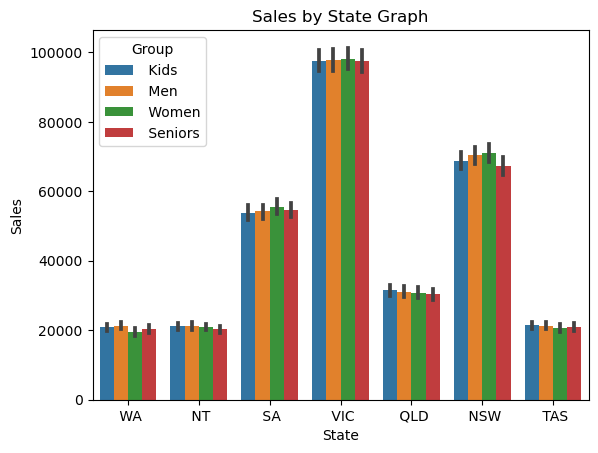

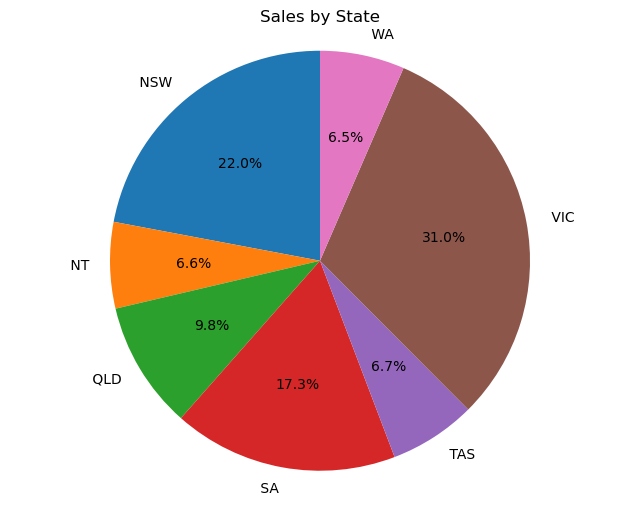

From the graph we can infer that the sales is highest in the VIC state followed by NSW and SA
The highest sales in VIC was from Women whereas it was lowest in WA The lowest sales states are WA, NT and TAS


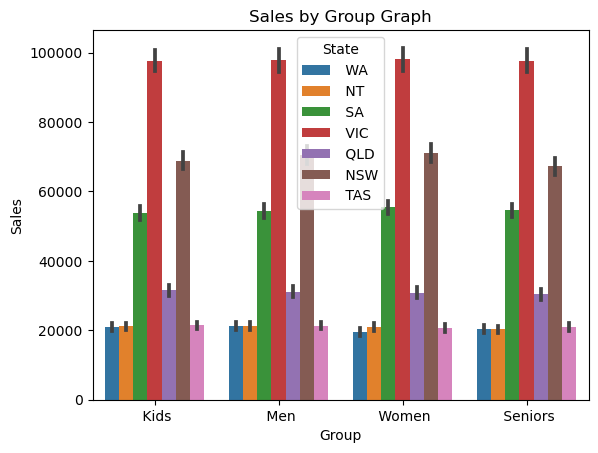

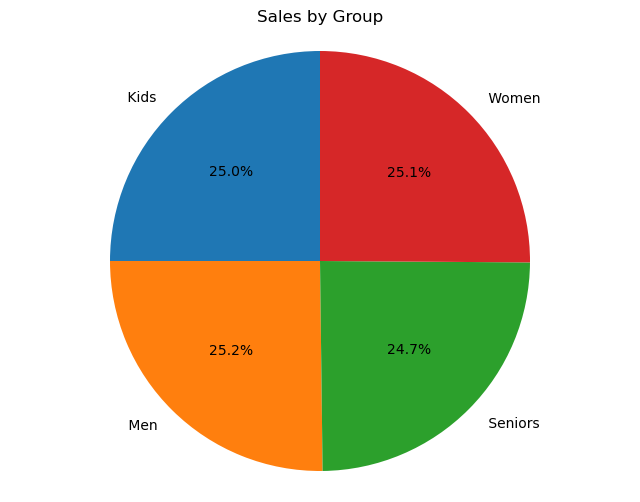

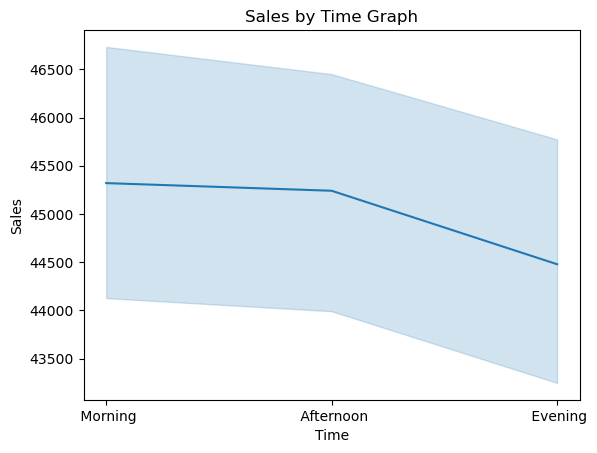

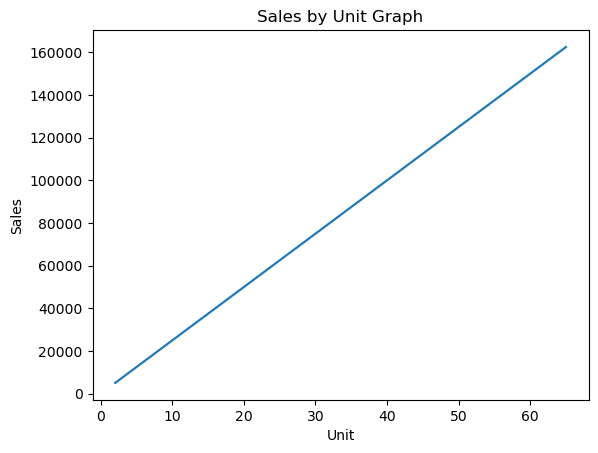

From the graphs of daily, weekly and monthly we can see that the november had the lowestsales


For Quaterly graph we have only one bar as the dataset contains data from only one quater.


In [79]:

#1
state_sales =sns.barplot(data =sales_data,x='State',y='Sales',hue ='Group')
plt.title('Sales by State Graph')
plt.show()
#or
state_sales = sales_data.groupby('State')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.pie(state_sales['Sales'], labels=state_sales['State'], autopct='%1.1f%%', startangle=90)
plt.title('Sales by State')
plt.axis('equal')
plt.show()
print("From the graph we can infer that the sales is highest in the VIC state followed by NSW and SA")
print("The highest sales in VIC was from Women whereas it was lowest in WA The lowest sales states are WA, NT and TAS")
#2
state_sales =sns.barplot(data =sales_data,x='Group',y='Sales', hue ='State')
plt.title('Sales by Group Graph')
plt.show()
#or
group_sales = sales_data.groupby('Group')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.pie(group_sales['Sales'], labels=group_sales['Group'], autopct='%1.1f%%', startangle=90)
plt.title('Sales by Group')
plt.axis('equal')
plt.show()

#3
time_sales =sns.lineplot(data =sales_data,x='Time',y='Sales')
plt.title('Sales by Time Graph')
plt.show()

#4
Unit_sales =sns.lineplot(data =sales_data,x='Unit',y='Sales')
plt.title('Sales by Unit Graph')
plt.show()

sales_data['Date'] = pd.to_datetime(sales_data['Date']) 

# Daily Sales
daily_sales = sales_data.groupby(sales_data['Date'].dt.date)['Sales'].sum()

# Weekly Sales
weekly_sales = sales_data.groupby(sales_data['Date'].dt.strftime('%Y-%U'))['Sales'].sum()

# Monthly Sales
monthly_sales = sales_data.groupby(sales_data['Date'].dt.to_period('M'))['Sales'].sum()

# Quarterly Sales
quarterly_sales = sales_data.groupby(sales_data['Date'].dt.to_period('Q'))['Sales'].sum()

#5 weekly
daily_report = sd.resample('D').agg({'Sales': 'sum'})
daily_sale = px.line(data_frame=daily_report, y='Sales', title='Daily Sales')
daily_sale.show()

#6 Weekly Sales Chart
weekly_report = sd.resample('W').agg({'Sales': 'sum'})
weekly_sale = px.line(data_frame=weekly_report, y='Sales', title='Weekly Sales')
weekly_sale.show()

#7 Monthly
monthly_report = sd.resample('M').agg({'Sales': 'sum'})
monthly_sale = px.line(data_frame=monthly_report, y='Sales', title='Monthly Sales')
monthly_sale.show()

print("From the graphs of daily, weekly and monthly we can see that the november had the lowestsales")

#8 Quarterly
quarterly_report = sd.resample('Q').sum()
quaterly_sale = go.Bar(x=quarterly_report.index,
                       y=quarterly_report['Sales'],
                       name='Quarterly Sales')

fig = go.Figure(quaterly_sale)
# Show the figure
fig.show()
print("For Quaterly graph we have only one bar as the dataset contains data from only one quater.")

Text(0, 0.5, 'Revenue')

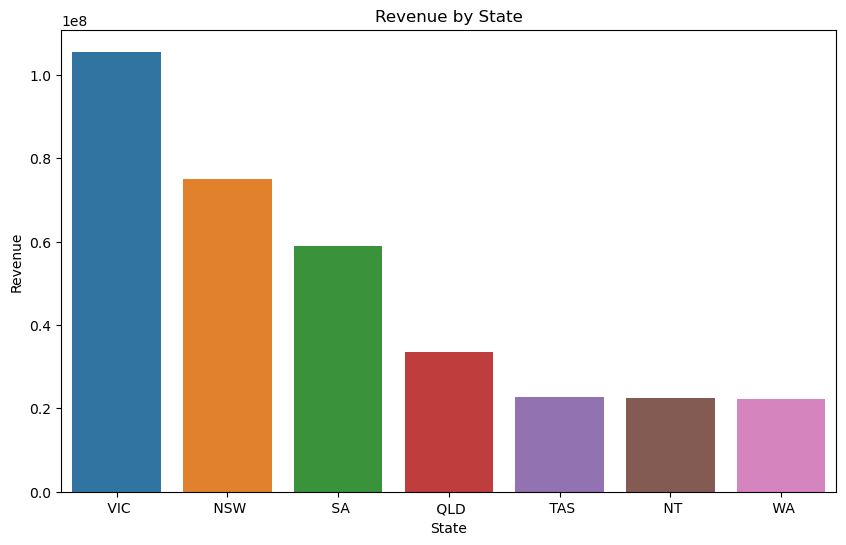

In [78]:
# Calculate state revenues
state_revenue = sd.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Select top and lower states
top_states = state_revenue
lower_states = state_revenue[::-1] 

# Concatenate top and lower states data
states_data = pd.concat([top_states, lower_states])

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=states_data.index, y=states_data.values)
plt.title('Revenue by State')
plt.xlabel('State')
plt.ylabel('Revenue')

## __We conclude  of the salse dashboard above the following:__   

The state generating **the highest revenue**s is: **VIC (Victoria) with 105565000 sales** 

Followed by **NSW (New South Wales),SA (South Australia),QLD (Queensland),TAS (|Tasmania) and NT (Northern Territory)** 

While the **lowest** state generating revenues is: **WA (Western Australia) with 22152500 sales.**


## __the head of S&M has formulated sales programs for states with lower revenues based on our recommendations which are:__
- Offer special discounts or promotions to incentivize purchases.
- Conduct market research to understand the local preferences and tailor product offerings accordingly.
- Strengthen relationships with existing customers through personalized support and loyalty programs.
- Collaborate with local businesses and influencers for co-marketing opportunities.
- Organize customer events or product demonstrations to engage with potential buyers.
- Provide excellent customer service to build positive word-of-mouth and repeat business.
- Continuously monitor and analyze sales data to identify trends and adjust strategies accordingly.